In [16]:
import sys 
sys.path.append("../scripts")
import numpy as np
import GalaxySN as gsn
import fitsFunctions as ff
import SNR as snr
import Strehl as st
import matplotlib.pyplot as plt
from scopesim_templates.misc import point_source
from astropy.visualization import simple_norm, MinMaxInterval, SqrtStretch, ImageNormalize


In [10]:
nova = point_source(sed="sne/sn1a",amplitude=-19,filter_curve="R")

In [11]:
spec=nova.spectra[0]
spec.get_magnitude(filter_curve="H")

<Magnitude -16.77653458 mag(AB)>

In [12]:
class absMag:
    """ 
    
    """
    def __init__(self,M,zKs,dKs,zJ,dJ,zY,dY, adKs, adJ, adY):
        self.M = M #absolute magnitude
        self.zKs = zKs #the redshift to Ks
        self.dKs = dKs #distance associated with zKs
        self.zJ = zJ
        self.dJ = dJ 
        self.mKs = 5*np.log10(self.dKs/10)+self.M #apparent mag
        self.mJ = 5*np.log10(self.dJ/10)+self.M
        self.zY = zY
        self.dY = dY 
        self.mY = 5*np.log10(self.dY/10)+self.M
        self.adKs = adKs #pc per mas
        self.adJ = adJ
        self.adY = adY

In [4]:
I = absMag(-18,1.7,12.9e9,0.55,3.21e9,.29,1.51e9,8.61,6.483,4.388)
R = absMag(-19,2.28,17.2e9,.884,5.75e9,.568,3.3e9,8.370,7.855,6.587)
V = absMag(-19,2.97,25.6e9,1.27,9.02e9,.897,5.85e9,7.878,8.486,7.889)
B = absMag(-19,3.94,35.9e9,1.84,14.3e9,1.36,9.82e9,7.140,8.58,8.548)
U = absMag(-19.2,5.24,50.3e9,2.58,21.6e9,1.98,15.6e9,6.268,8.169,8.530)
uvw1 = absMag(-18,7.31,74.2e9,3.77,34.1e9,2.96,25.5,5.207,7.266,7.886)
uvw2 = absMag(-16,10.1,107e9,5.39,52e9,4.31,40e9,4.226,6.179,6.875)
absmaglist = [I,R,V,B,U,uvw1,uvw2]

In [39]:
for X in absmaglist:
    print(X.zY)

0.29
0.568
0.897
1.36
1.98
2.96
4.31


In [42]:
Ystrehllist = []
Yzlist = []
YSNRlist = []
YFWHMlist = []
for X in absmaglist:
    point,pointgal,gal = gsn.gal_SN_galsubtract(SNmag=X.mY,galmag=X.mY,galr=600/(1000*X.adY),diffx=500/(1000*X.adY),dit=1,ndit=900,filter="Y",fw1="Y",fw2="open",AOsystem="SCAO",pix_scale=4)
    strehl,_,_ = st.calculate_strehl_from_array(array=point, pixelscale=4, photofilter="Y")
    Ystrehllist.append(strehl)
    Yzlist.append(X.zY)
    SNratio = snr.get_SNR2(point,R=10,nws=10)
    YSNRlist.append(SNratio)
    fwhmval = ff.FWHM(point[int(len(point)/2)])
    YFWHMlist.append(fwhmval)

astar.scopesim.effects.ter_curves_utils - ERROR: Unable to load Y from C:\Users\krist\.astropy\cache\download\url\fbdbfeb326d8d7ae4498fd672be4ded8\contents.


ValueError: No table found

In [41]:
Jstrehllist = []
Jzlist = []
JSNRlist = []
JFWHMlist = []
for X in absmaglist:
    point,pointgal,gal = gsn.gal_SN_galsubtract(SNmag=X.mJ,galmag=X.mJ,galr=600/(1000*X.adJ),diffx=500/(1000*X.adJ),dit=1,ndit=900,filter="J",fw1="J",fw2="open",AOsystem="SCAO",pix_scale=4)
    strehl,_,_ = st.calculate_strehl_from_array(array=point, pixelscale=4, photofilter="J")
    Jstrehllist.append(strehl)
    Jzlist.append(X.zJ)
    SNratio = snr.get_SNR2(point,R=10,nws=10)
    JSNRlist.append(SNratio)
    fwhmval = ff.FWHM(point[int(len(point)/2)])
    JFWHMlist.append(fwhmval)

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


KeyboardInterrupt: 

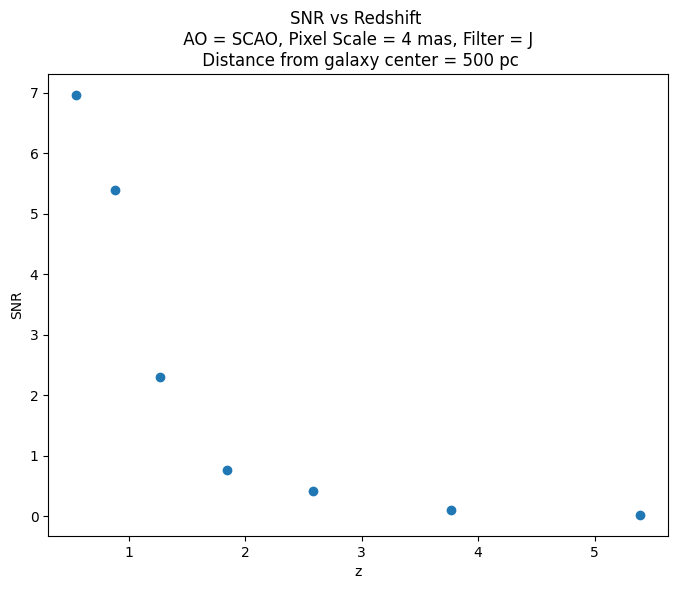

In [30]:
plt.figure(figsize=[8,6])
plt.scatter(Jzlist,JSNRlist)
plt.title("SNR vs Redshift \n AO = SCAO, Pixel Scale = 4 mas, Filter = J \n Distance from galaxy center = 500 pc")
plt.ylabel("SNR")
plt.xlabel("z")
plt.show()

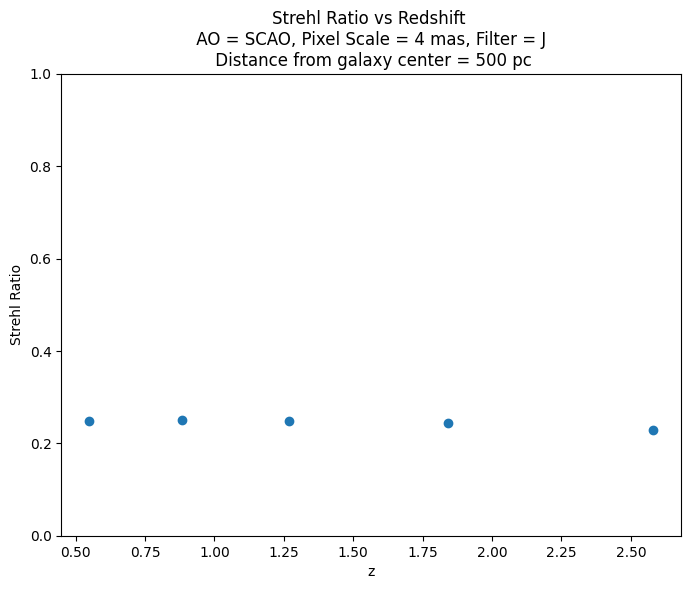

In [34]:
plt.figure(figsize=[8,6])
plt.scatter(Jzlist[0:5],Jstrehllist[0:5])
plt.title("Strehl Ratio vs Redshift \n AO = SCAO, Pixel Scale = 4 mas, Filter = J \n Distance from galaxy center = 500 pc")
plt.ylabel("Strehl Ratio")
plt.xlabel("z")
plt.ylim(0,1)
plt.show()

In [14]:
print(JFWHMlist)

[5, 5, 5, 5, 'none', 'none', 'none']


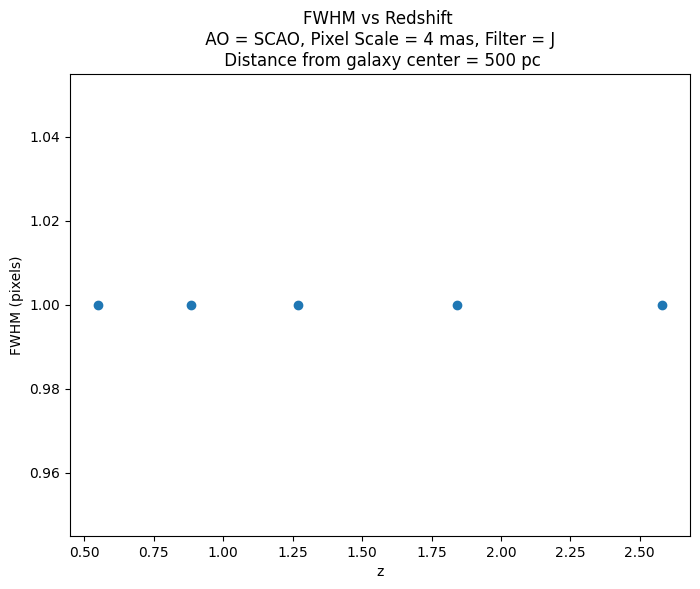

In [37]:
plt.figure(figsize=[8,6])
plt.scatter(Jzlist[0:5],JFWHMlist[0:5])
plt.title("FWHM vs Redshift \n AO = SCAO, Pixel Scale = 4 mas, Filter = J \n Distance from galaxy center = 500 pc")
plt.ylabel("FWHM (pixels)")
plt.xlabel("z")
plt.show()

In [2]:
strehltest,strehltestarr,strehltestairyarr = st.make_source_return_strehl(amp=22,AOsystem="SCAO",pixelscale=1.5,photofilter="Ks")
print(strehltest)

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


0.5425163748430666


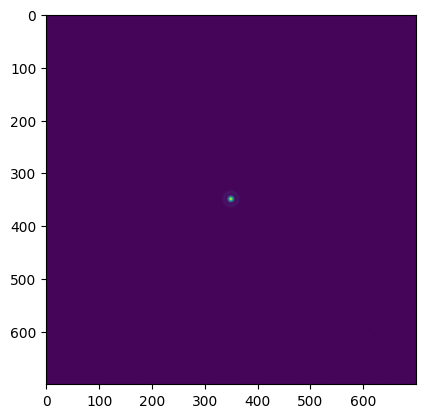

In [3]:
plt.imshow(strehltestarr)

In [32]:
pointtest1,pointgaltest1,galtest1 = gsn.gal_SN_galsubtract(SNmag=R.mKs,galmag=R.mKs,galr=5000/(1000*R.adKs),diffx=5000/(1000*R.adKs),dit=1,ndit=900,filter="Ks",fw1="open",fw2="Ks",AOsystem="SCAO",pix_scale=1.5)

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


(1000, 1000) (1000, 1000) (1000, 1000)


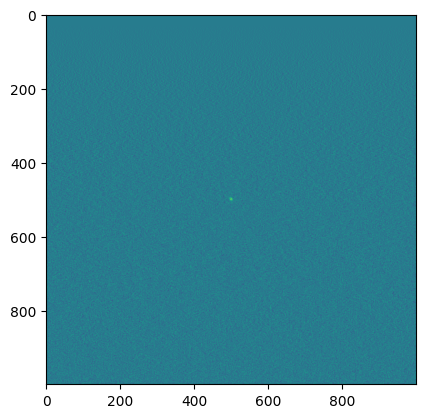

In [38]:
plt.imshow(pointtest1)

In [45]:
snrtest = snr.get_SNR2(pointtest1,R=10,nws=10)
print(snrtest)

0.8234476623057547


In [35]:
pointtest, pointgaltest, galtest  = gsn.gal_SN_galsubtract(SNmag=21,galmag=19,galr=.2,diffx=.11,dit=1000,ndit=1,filter="Ks",fw1="open",fw2="Ks",AOsystem="SCAO",pix_scale=1.5,ex_count=4)
#galsubtest, _,_ = gsn.gal_SN_galsubtract(SNmag=20,galmag=20,galr=.5,diffx=.5,dit=1000,ndit=1,filter="Ks",fw1="open",fw2="Ks",AOsystem="SCAO",pix_scale=4,ex_count=4)

#strehltest2 = st.calculate_strehl_from_array(array=pointtest, pixelscale=4, photofilter="Ks")
#print(strehltest2)


 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


(1000, 1000) (1000, 1000) (1000, 1000)


Text(0.5, 1.0, 'Galaxy Without Supernova')

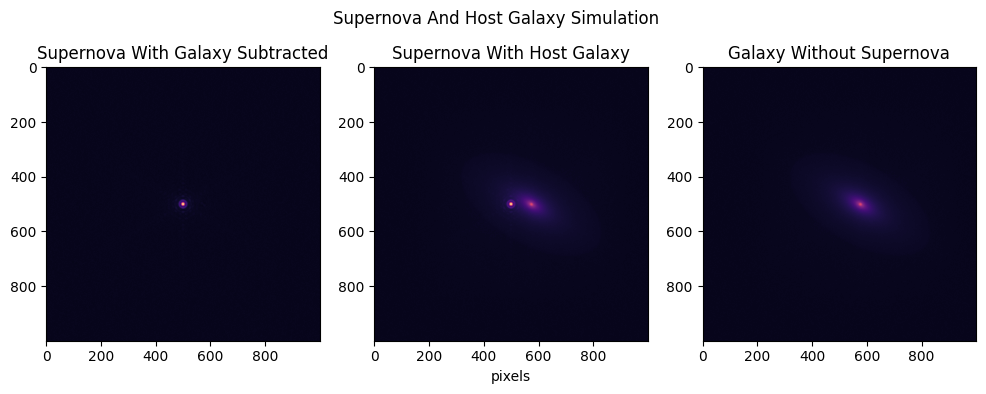

In [36]:
norm = ImageNormalize(pointgaltest, interval=MinMaxInterval(),stretch=SqrtStretch())
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle(f"Supernova And Host Galaxy Simulation")
ax[0].imshow(pointtest,norm=norm,cmap="magma")
ax[0].set_title(f"Supernova With Galaxy Subtracted")
ax[1].imshow(pointgaltest,norm=norm,cmap="magma")
ax[1].set_title(f"Supernova With Host Galaxy")
ax[1].set_xlabel("pixels")
ax[2].imshow(galtest,norm=norm,cmap="magma")
ax[2].set_title(f"Galaxy Without Supernova")

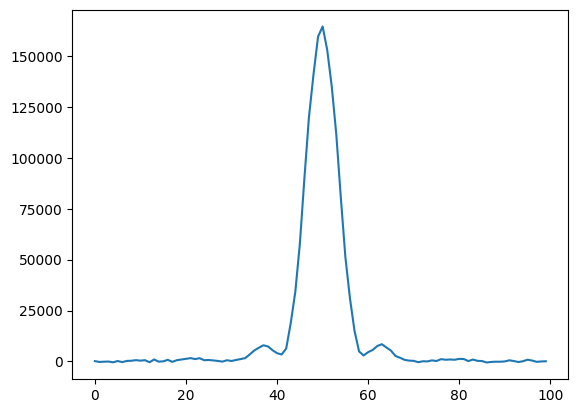

In [22]:
plt.plot(range(100),pointtest[450:550,500])

In [6]:
strehl, pointarr, airyarr = st.calculate_strehl_from_array(array=pointtest, pixelscale=1.5, photofilter="Ks")
print(strehl)

0.5238689513320892


In [37]:
strehl1, pointarr1, airyarr1 = st.calculate_strehl_from_array(array=pointtest1, pixelscale=1.5, photofilter="Ks")
print(strehl1)

0.8213585367438994


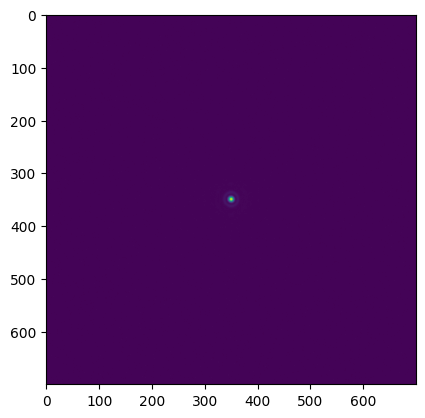

In [10]:
plt.imshow(pointarr)

In [2]:
mags = range(22,30)
snrlist = []
for m in mags:
    filename = ff.makeFits(amp=m)
    reduced = ff.reduce(filename,f'{filename}_sky')
    SNratio = snr.get_SNR2(reduced,R=4, nws=50)
    snrlist.append(SNratio)

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


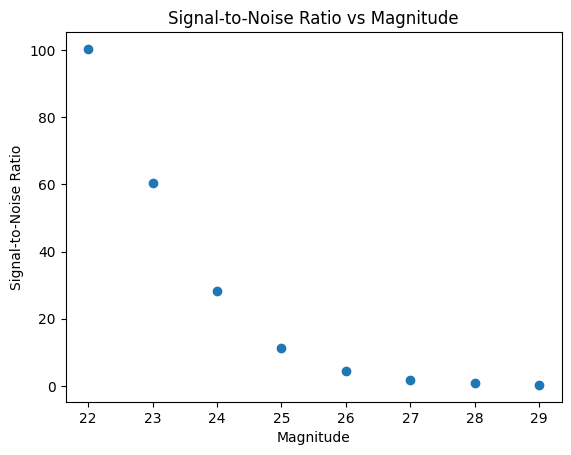

In [3]:
plt.figure()
plt.scatter(mags,snrlist)
plt.xlabel("Magnitude")
plt.ylabel("Signal-to-Noise Ratio")
plt.title("Signal-to-Noise Ratio vs Magnitude")
plt.savefig('C:/Users/krist/Dropbox/masters thesis/thesis sep8/figs/SNR_vs_mag.png')

In [4]:
print(snrlist)

[100.29677319786082, 60.28881352866306, 28.23729352477812, 11.3438377516989, 4.530548939957834, 1.8925100990746673, 0.7246439958851135, 0.2901856238380377]
